In [1]:
import matplotlib.pyplot as plt
import geopandas
import sqlite3
import pandas as pd
import numpy as np
from us_state_abbrev import us_state_abbrev, abbrev_us_state

#make_db creates a database file from a json file containing tweets
%run make_db.py
conn = sqlite3.connect("easProj.db")

#.shp files contains the data used to create a map of the USA
#states is a GeoDataFrame, which has the features of a regular dataframe, but has some additional methods for working with coordinate data
#states['NAME'] contains the name of the each state
states_map_path = 'data/usa-states-census-2014.shp'
states = geopandas.read_file(states_map_path)

#Use proper projection for North America
states = states.to_crs("EPSG:3395")


Index(['created_at', 'id', 'user_id', 'text', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang'],
      dtype='object')


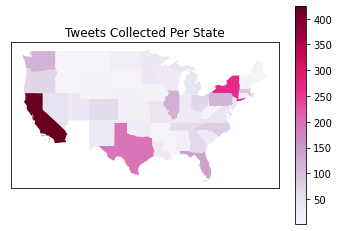

In [2]:
#This query gets the number of tweets per state
ex_query = "select u.state NAME, count(t.id) num_tweets from users u, tweets t where u.id = t.user_id group by u.state"
ex_df = pd.read_sql_query(ex_query, conn) 

#add the column to the states GeoDataFrame with a merge
states = states.merge(ex_df, on='NAME', how='left')

#Plot the map, and color the states based on the values in the newly added column
#GoDataFrame.plot takes the following options:
#column: column of dataframe that contains your values ('um_tweets'in this case)
#cmap: color scheme to use - PuRd maps bolder colors to higher values
#    Oher options can be found at: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
#    Should use a different color scheme for different plots
states.plot(column='num_tweets', cmap='PuRd', legend=True)

#make a title 
plt.title('Tweets Collected Per State')

#x and y axes are displayed by default
#but for this map they represent lat and long
#which we don't need to show, so we'll
#Get the Currently plotted Axes... 
ax = plt.gca()
#And hide them
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.show()